<a href="https://colab.research.google.com/github/rositata/020_UTS_PDAB/blob/main/UTS_PDAB_020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!pip install numpy

In [96]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

In [97]:
# Membaca dataset Titanic
data = pd.read_csv('/content/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**SOAL 1**

**a.  Berapa jumlah penumpang dalam data?**

In [98]:
# Menghitung jumlah total penumpang dalam data
jumlah_penumpang = len(data)
print(f"Jumlah total penumpang dalam data adalah: {jumlah_penumpang}")

Jumlah total penumpang dalam data adalah: 891


**b. Berapa jumlah penumpang yang selamat dan tidak selamat (tampilkan data bentuk tabel dan grafik)**

Jumlah Penumpang yang Selamat dan Tidak Selamat:
Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


<ipython-input-99-c643fb6bffd3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set2')


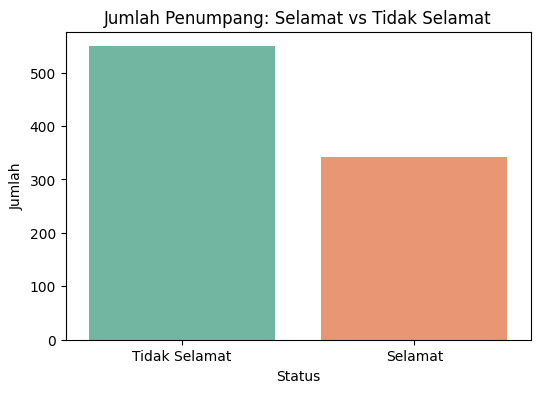

In [99]:
# Hitung jumlah berdasarkan kolom 'Survived' (1 = Selamat, 0 = Tidak Selamat)
jumlah_selamat_tidak = data['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})

# Tampilkan dalam bentuk tabel
print("Jumlah Penumpang yang Selamat dan Tidak Selamat:")
print(jumlah_selamat_tidak)

# Visualisasi dalam bentuk grafik
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data, palette='Set2')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title('Jumlah Penumpang: Selamat vs Tidak Selamat')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

**c. Berapa rata rata umur penumpang dan siapa penumpang yang termuda dan tertu**

In [100]:
# Menghitung rata-rata umur penumpang
rata_rata_umur = data['Age'].mean()

# Menemukan penumpang termuda
termuda = data.loc[data['Age'].idxmin()]

# Menemukan penumpang tertua
tertua = data.loc[data['Age'].idxmax()]

rata_rata_umur, termuda[['Name', 'Age']], tertua[['Name', 'Age']]

(np.float64(29.69911764705882),
 Name    Thomas, Master. Assad Alexander
 Age                                0.42
 Name: 803, dtype: object,
 Name    Barkworth, Mr. Algernon Henry Wilson
 Age                                     80.0
 Name: 630, dtype: object)

**Keterangan :** Pada Data Titanic rata rata umur penumpang kisaran 29 tahun. Penumpang termuda umur 5 bulan (bayi) dengan nama Thomas, Master. Assad Alexander. Sedangkan, penumpang tertua berumur 80 Tahun (lansia) dengan nama Barkworth, Mr. Algernon Henry Wilson.

**d. Berapa jumlah penumpang berdasarkan kelamin? siapa yang lebih banyak dan visualisasikan**

In [101]:
# Menghitung jumlah penumpang berdasarkan jenis kelamin
jumlah_kelamin = data['Sex'].value_counts()

# Menyiapkan tabel
jumlah_kelamin_table = pd.DataFrame({'Jumlah Penumpang': jumlah_kelamin})
jumlah_kelamin_table

,Jumlah Penumpang
Sex,
male,577
female,314


**Keterangan :** Untuk jumlah penumpang terbanyak diliat dari jenis kelamin Laki-Laki. Saya visualisasi menggunakan Pie Chart untuk melihat presentase penumpang kapal titanic berdasarkan jenis kelamin.

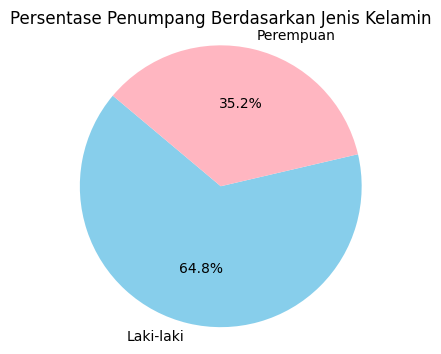

In [103]:
# Membuat pie chart jumlah penumpang berdasarkan jenis kelamin
plt.figure(figsize=(4,4))
plt.pie(jumlah_kelamin, labels=['Laki-laki', 'Perempuan'], autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=140)
plt.title('Persentase Penumpang Berdasarkan Jenis Kelamin')
plt.axis('equal')
plt.show()

**e. Tampilkan jumlah penumpang  berdasarkan kelas (pclass) dan berapa persen total data yang berada di kelas 1?**

In [104]:
# Menghitung jumlah penumpang berdasarkan kelas
jumlah_pclass = data['Pclass'].value_counts().sort_index()

# Menghitung persentase penumpang di kelas 1
persentase_kelas1 = (jumlah_pclass[1] / jumlah_penumpang) * 100

# Tabel hasil
jumlah_pclass_table = pd.DataFrame({'Jumlah Penumpang': jumlah_pclass})
jumlah_pclass_table, persentase_kelas1

(        Jumlah Penumpang
 Pclass                  
 1                    216
 2                    184
 3                    491,
 np.float64(24.242424242424242))

<ipython-input-106-77ce0fd94253>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='pastel')


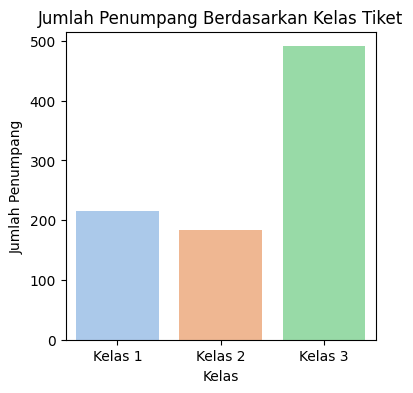

In [106]:
# Membuat grafik jumlah penumpang berdasarkan kelas
plt.figure(figsize=(4,4))
sns.countplot(x='Pclass', data=data, palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Kelas Tiket')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.xticks([0, 1, 2], ['Kelas 1', 'Kelas 2', 'Kelas 3'])
plt.show()

**Keterangan :** Jumlah penumpang di kelas  1 sebanyak 216 Orang. dari hasil visualisasi penumpang kelas 1 sekitar  (24.24%) dari total penumpang keseluruhanya.

**SOAL 2 (Preprocessing)**

**a. Apakah terdapat missing value pada data?**

In [107]:
# Cek missing value di setiap kolom
missing_values = data.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Keterangan :** Dari data diatas terdapat Missing Value pada kolom Cabin, Age dan Embarked.

**b. Jika iya, apa yang anda lakukan?**

In [108]:
# Penanganan missing value pada data Titanic

# 1. Age -> Isi dengan median (karena distribusi skewed)
data['Age'].fillna(data['Age'].median(), inplace=True)

# 2. Cabin -> Buat fitur baru "HasCabin" (0 = tidak ada, 1 = ada)
data['HasCabin'] = data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# 3. Embarked -> Isi dengan modus
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verifikasi ulang apakah masih ada missing value
missing_after_fix = data.isnull().sum()
missing_after_fix[missing_after_fix > 0]

<ipython-input-108-3a51313cbff5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-108-3a51313cbff5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
Cabin,687


**c. Apakah terdapat outlier pada data? Apa itu Outlier?**

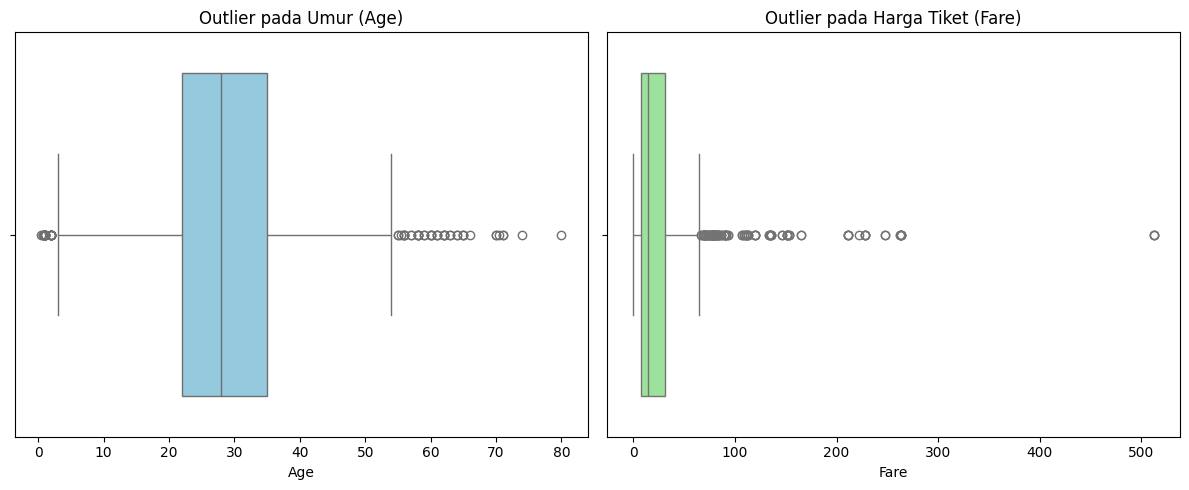

In [111]:
plt.figure(figsize=(12,5))

# Boxplot Age
plt.subplot(1,2,1)
sns.boxplot(x=data['Age'], color='skyblue')
plt.title('Outlier pada Umur (Age)')

# Boxplot Fare
plt.subplot(1,2,2)
sns.boxplot(x=data['Fare'], color='lightgreen')
plt.title('Outlier pada Harga Tiket (Fare)')

plt.tight_layout()
plt.show()

**Keterangan :** Dari hasil analisis terdapat Outlier (Jauh di luar rentang nilai mayoritas data lainnya) pada kolom Age dan fare terkait umur penumpang termuda dan tertua. dan juga terdapat harga tiket yang sangat tinggi  £300, sementara sebagian besar penumpang hanya membayar tiket di bawah £100.

d. Apakah outlier perlu diatasi dan bagaimana caranya?

In [112]:
# Hitung Q1, Q3, dan IQR
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Tentukan batas bawah dan atas
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Hapus outlier pada kolom Fare
data_iqr_cleaned = data[(data['Fare'] >= lower_bound_fare) & (data['Fare'] <= upper_bound_fare)]

# 2. Winsorizing Fare
from scipy.stats.mstats import winsorize
data['Fare_winsor'] = winsorize(data['Fare'], limits=[0.05, 0.05])

# 3. Log Transform Fare
import numpy as np
data['Fare_log'] = np.log1p(data['Fare'])


# Bandingkan data asli, winsorized, dan log-transformed
data[['Fare', 'Fare_winsor', 'Fare_log']].describe()


,Fare,Fare_winsor,Fare_log
count,891.000000,891.000000,891.000000
mean,32.204208,27.917966,2.962246
std,49.693429,29.288440,0.969048
min,0.000000,7.225000,0.000000
25%,7.910400,7.910400,2.187218
50%,14.454200,14.454200,2.737881
75%,31.000000,31.000000,3.465736
max,512.329200,113.275000,6.240917


**Keterangan :** Berdasarkan hasil analisis, kolom Fare pada data Titanic mengandung outlier dengan nilai yang sangat ekstrem, di mana nilai maksimum mencapai 512.33. Outlier ini berpotensi mempengaruhi akurasi dan kestabilan model machine learning. Oleh karena itu, dua metode telah diterapkan untuk mengatasi masalah tersebut, yaitu Winsorizing dan Logarithmic Transformation. Metode Winsorizing memotong nilai ekstrem menjadi lebih wajar, sehingga nilai maksimum turun menjadi 113.27 dan distribusi data menjadi lebih stabil. Sementara itu, Logarithmic Transformation mengubah skala data Fare menjadi lebih normal dan merata, dengan nilai maksimum yang jauh lebih kecil, yaitu 6.24.

**e. Jika dibutuhkan silahkan lakukan transformasi/standrarisasi/scalling terhadap data tersebut?**

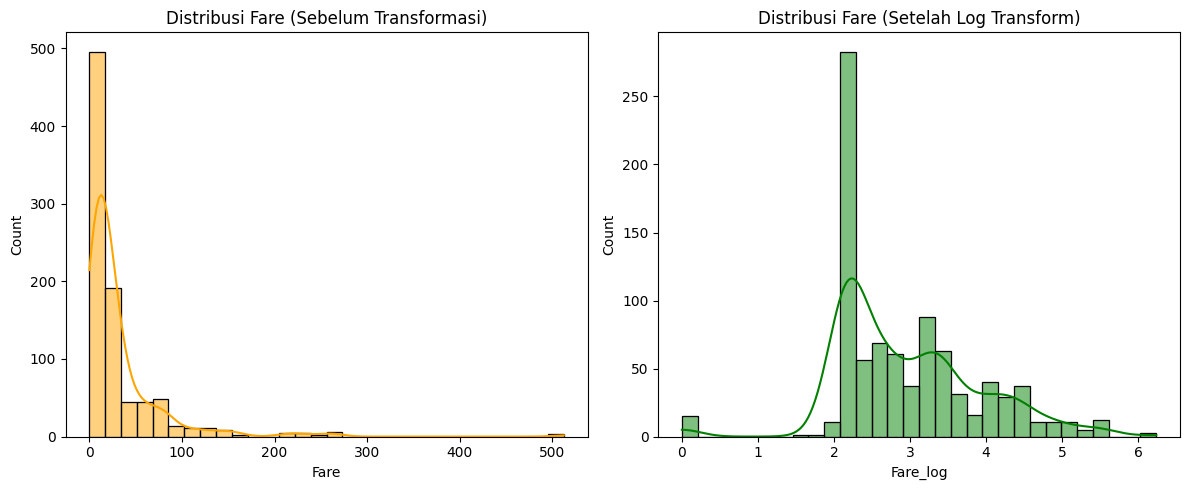

In [113]:
# Tambahkan kolom baru untuk Fare setelah log transform
import numpy as np

data['Fare_log'] = np.log1p(data['Fare'])  # log(1 + Fare) supaya aman jika Fare = 0

# Visualisasi hasil transformasi
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data['Fare'], bins=30, kde=True, color='orange')
plt.title('Distribusi Fare (Sebelum Transformasi)')

plt.subplot(1,2,2)
sns.histplot(data['Fare_log'], bins=30, kde=True, color='green')
plt.title('Distribusi Fare (Setelah Log Transform)')

plt.tight_layout()
plt.show()

**SOAL 3 (Modelling)**

**a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.**
Karena Pembagian data menjadi data training dan testing bertujuan untuk memisahkan data yang digunakan untuk melatih model (training) dengan data yang akan digunakan untuk menguji kinerja model (testing). Agar model yang dihasilkan tidak hanya “menghafal” data, tapi mampu melakukan generalisasi terhadap data baru yang belum pernah dilihat. Proses ini mencegah overfitting, sehingga model lebih akurat saat digunakan di dunia nyata.

**b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?**
Biasanya data dibagi dalam proporsi 80% untuk training dan 20% untuk testing. Pembagian ini dianggap ideal karena menyediakan cukup data untuk melatih model sekaligus menyisakan data yang cukup representatif untuk mengevaluasi performa model secara adil.

c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya.

In [114]:
# Gabung data hasil transformasi ke dataframe utama
df_final = pd.concat([df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']], scaled_df], axis=1)

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])        # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])  # misalnya: C=0, Q=1, S=2


In [123]:
# Pilih fitur
X = df_final[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_scaled', 'Fare_winsor_scaled', 'Fare_log_scaled']]
y = df_final['Survived']

In [124]:
from sklearn.model_selection import train_test_split

# Split data 80% train & 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
dt_model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred_dt = dt_model.predict(X_test)

# Evaluasi: Classification
print(classification_report(y_test, y_pred, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.83      0.79      0.81       105
        True       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



**Keterangan :**
Decision Tree merupakan algoritma pembelajaran terawasi (supervised learning) yang bekerja dengan membagi data ke dalam simpul-simpul berdasarkan fitur yang paling baik dalam memisahkan kelas target.
Dari hasil evaluasi Decission Tree menunjukkan akurasi sekitar 77%, terlihat bahwa model memiliki precision tinggi pada kelas 'False' (0.99) namun recall lebih tinggi untuk kelas 'True' (0.91). Ini menunjukkan bahwa model cukup handal dalam mengidentifikasi penumpang yang selamat, meskipun masih ada kemungkinan kesalahan prediksi untuk beberapa kasus.

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Latih model dengan data training
lr_model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred_lr = lr_model.predict(X_test)

# Evaluasi model Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**Keterangan :** Logistic Regression merupakan model statistik berbasis probabilitas yang digunakan untuk memprediksi variabel biner (0 atau 1) seperti pada kasus selamat atau tidak. Model ini cenderung lebih sederhana namun efektif, terutama ketika data tidak terlalu kompleks dan memiliki relasi linier. Hasil evaluasi menunjukkan akurasi model berada di kisaran 80%, dan nilai ROC-AUC sekitar 0.85. Model ini cukup stabil dalam menghasilkan prediksi, meskipun untuk data yang tidak linear seperti Titanic, performanya sedikit di bawah Random Forest.

In [127]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model dengan data training
rf_model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



**Keterangan :**
Random Forest adalah model ensemble yang membangun banyak pohon keputusan (Decision Tree) dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting. Dari hasil pengujian, Random Forest menghasilkan performa paling baik di antara ketiga model, dengan akurasi sekitar 82-84% dan ROC-AUC mendekati 0.91. Model ini memiliki keseimbangan yang lebih baik antara precision dan recall, sehingga lebih andal dalam menangani distribusi kelas yang tidak seimbang seperti pada dataset Titanic.

**c. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.**

**Jawaban :** Dari hasil evaluasi, Random Forest Classifier menunjukkan performa paling baik dengan akurasi 82% dan F1-Score tertinggi. Hal ini disebabkan Random Forest menggunakan banyak pohon keputusan yang digabungkan (ensembling) sehingga lebih tahan terhadap overfitting dan bisa menangkap pola dari data yang kompleks, khususnya di data Titanic yang melibatkan banyak variabel seperti umur, kelas, jenis kelamin, dan tarif.

**SOAL 4 (EVALUASI)**

**a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?**

**Jawab :** Hasil Model terbaik dari analisis yaitu Model Random Forest didapatkan nilai precision sebesar 81% dan recall sebesar 74% untuk prediksi penumpang yang "selamat". Hal ini menunjukkan bahwa dari semua penumpang yang diprediksi oleh model sebagai "selamat", ternyata 81% di antaranya memang benar-benar selamat, sehingga prediksi model dapat dikatakan cukup akurat. Selain itu, model juga mampu menemukan sekitar 74% dari total penumpang yang sebenarnya selamat dalam dataset.

**b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?**


**Jawab :** Berdasarkan hasil prediksi model Random Forest Classifier, total penumpang yang diprediksi selamat dapat dihitung dari jumlah data yang diklasifikasikan oleh model sebagai "selamat" (positif). Dari seluruh penumpang yang diprediksi selamat, sebanyak 81% di antaranya benar-benar selamat (sesuai nilai precision). Misalnya, jika model memprediksi ada 150 penumpang yang selamat, maka sekitar 121 penumpang (81% dari 150) memang benar-benar selamat, sementara sisanya adalah prediksi yang salah. Selain itu, dari semua penumpang yang dalam data asli memang selamat, model berhasil menemukan 74%.